# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [98]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [99]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [100]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [101]:
#Split inti train and test data with Sklearn method

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1)  #90% des Datensatzes sind Traingsdaten und 10% davon sind Testdaten

In [102]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('x_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (63000, 784)
Y_train: (63000,)
x_test:  (7000, 784)
y_test:  (7000,)


### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

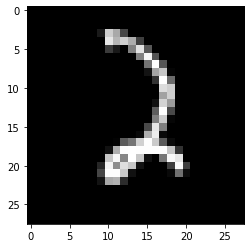

In [103]:
#Data visualization
#The first row represents the first image, it is 28X28 image (stored as 784 pixels)

img= X_train[0].reshape(28,28)

plt.imshow(img, cmap="gray")


### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [104]:
#models festlegen

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Simple lienar Model
from sklearn import linear_model
linear = linear_model.SGDClassifier(loss = 'log', max_iter = 40)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [105]:
gnb.fit(X_train, y_train)

GaussianNB()

In [106]:
linear.fit(X_train, y_train)

C:\Users\Lena Huber\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=40)

In [107]:
forest.fit(X_train, y_train)

RandomForestClassifier()

Accurancy Score 

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [109]:
#Naive Bayes
prediction_b = gnb.predict(X_train)
accuracy_score(y_train, prediction_b )

0.5606666666666666

In [110]:
#Confusion Matrix Naive Bayes
confusion_matrix(y_train,prediction )

array([[ 672,  887,  224,  285,  101,   43,  867,  227, 1333, 1591],
       [ 800,  940,  250,  342,  122,   43, 1062,  216, 1497, 1795],
       [ 755,  843,  217,  308,   84,   49,  949,  219, 1326, 1561],
       [ 707,  842,  231,  319,  115,   41, 1016,  217, 1357, 1588],
       [ 706,  803,  222,  290,  105,   51,  873,  216, 1401, 1450],
       [ 618,  743,  216,  261,   93,   38,  838,  231, 1201, 1415],
       [ 639,  785,  212,  303,  106,   52,  982,  216, 1357, 1554],
       [ 694,  866,  256,  305,  101,   45,  960,  248, 1407, 1686],
       [ 638,  818,  207,  273,  115,   44,  890,  218, 1306, 1630],
       [ 702,  843,  221,  289,  112,   57,  889,  201, 1326, 1635]],
      dtype=int64)

In [111]:
#Linear
prediction_l = linear.predict(X_train)
accuracy_score(y_train, prediction_l)

0.8681746031746032

In [112]:
confusion_matrix(y_train, prediction)

array([[ 672,  887,  224,  285,  101,   43,  867,  227, 1333, 1591],
       [ 800,  940,  250,  342,  122,   43, 1062,  216, 1497, 1795],
       [ 755,  843,  217,  308,   84,   49,  949,  219, 1326, 1561],
       [ 707,  842,  231,  319,  115,   41, 1016,  217, 1357, 1588],
       [ 706,  803,  222,  290,  105,   51,  873,  216, 1401, 1450],
       [ 618,  743,  216,  261,   93,   38,  838,  231, 1201, 1415],
       [ 639,  785,  212,  303,  106,   52,  982,  216, 1357, 1554],
       [ 694,  866,  256,  305,  101,   45,  960,  248, 1407, 1686],
       [ 638,  818,  207,  273,  115,   44,  890,  218, 1306, 1630],
       [ 702,  843,  221,  289,  112,   57,  889,  201, 1326, 1635]],
      dtype=int64)

In [113]:
#Random Forest
prediction_f = forest.predict(X_train)
accuracy_score(y_train, prediction_f)

1.0

In [114]:
confusion_matrix(y_train, prediction_f)

array([[6230,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 7067,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6311,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6433,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 6117,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5654,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6206,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6568,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6139,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6275]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

#### Test accuracy

In [115]:
#Naive Bayes
pred_test_b = gnb.predict(X_test)
accuracy_score(y_test, pred_test_b )

0.5457142857142857

In [116]:
#Linear
pred_test_l = linear.predict(X_test)
accuracy_score(y_test, pred_test_l)

0.8531428571428571

In [117]:
#Random Forest
pred_test_f = forest.predict(X_test)
accuracy_score(y_test, pred_test_f)

0.9702857142857143

#### F_Measure

In [118]:
from sklearn.metrics import f1_score


In [119]:
#Naive Bayes

test_bayes_fscore = f1_score(y_test,pred_test_b, average = 'micro' )
print(test_bayes_fscore)

0.5457142857142857


In [120]:
#Linear
test_linear_fscore = f1_score(y_test,pred_test_l, average = 'micro' )
print(test_linear_fscore)

0.8531428571428571


In [121]:
#Forest
test_forest_fscore = f1_score(y_test,pred_test_f, average = 'micro' )
print(test_bayes_fscore)

0.5457142857142857


In [122]:
#Diagramm --> ROC (Class 5)
from sklearn import metrics
five = (y_test == '5')

#naive bayes
bayes = (pred_test_b == '5')

#linear
linear = (pred_test_l == '5')

forest = (pred_test_f == '5')

In [123]:
bayes_fpr, bayes_tpr, bayes_thresholds = metrics.roc_curve(five, bayes)
linear_fpr, linear_tpr, linear_thresholds = metrics.roc_curve(five, linear)
forest_fpr, forest_tpr, forest_thresholds = metrics.roc_curve(five, forest)

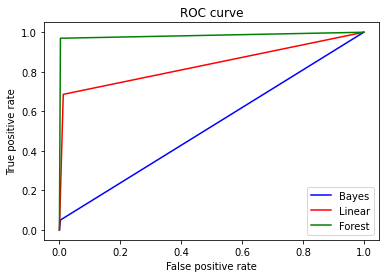

In [124]:
plt.plot(bayes_fpr,bayes_tpr, color = 'blue', label = "Bayes")
plt.plot(linear_fpr,linear_tpr, color = 'red', label = "Linear")
plt.plot(forest_fpr,forest_tpr, color = 'green',label = "Forest")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()